### This jupyter notebook is to unit-test CFE model run

## Preparation

In [1]:
!pip install spotpy

In [1]:
# Import modules
import os
import sys
import numpy as np
import pandas as pd
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import json

cfe_ver = "Ryoko"
if cfe_ver == "Ryoko":
    sys.path.append("G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/libs/cfe/py_cfe")
elif cfe_ver == "NOAA":
    sys.path.append("G:/Shared drives/Ryoko and Hilary/Github_ex/cfe/py_cfe")
    
import cfe
import bmi_cfe

# Specify current directory create output directory if it does not exist
os.chdir("G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/libs")
os.getcwd()
out_path = './unit_test_out'
if not os.path.exists(out_path):
    os.mkdir(out_path)
data_file_path = '..\\2_data_input\\unit_test'

## Read inputs & set input parameters

In [14]:
if cfe_ver == "Ryoko": 
    # Input: Mahurangi data for 3 yrs
    # Parameter: only limited number of parameters
    
    input_path = '../2_data_input/unit_test/config_cfe_jupyter.json'
    input_config = {
        "forcing_file": "G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/2_data_input/unit_test/mahurangi_1998_2001_constprecip.csv",
        "catchment_area_km2": 46.65, 
        "soil_params": { # bounds, init
            "bb":10, # 2-15, 8.17
            "satdk": 0.00013888888, # 1E-07-1E-05, but can be larger? 
            "slop": 1, # 0-1, 0.02
            "satpsi": 0.78, # 0.02-0.78, 0.263 
            "smcmax": 0.9,  # 0.33-0.7, 0.57
            "wltsmc": 0.310002781,  # 0-0.7, 0.35 or 0.17
            "D": 0.87                     # fixed 
        },   
        "max_gw_storage":0.5,        # 10-250, 16 or 50
        "Cgw": 5, # ?, 0.01 or 1
        "expon": 0.0002, # 1-8, 3 or 6
        "lksatfac": 10000, # 10-10000
        "dd": 0.035,
        "K_nash":0.1,         
        "nash_storage": [0.0, 0.0, 0.0],                  # fixed
        "giuh_ordinates": [0.1, 0.2, 0.4, 0.2, 0.1], # [0.1, 0.35, 0.2, 0.14, 0.1, 0.06, 0.05], # fixed # 
        "trigger_z_fact":0.8,         # 0.01-0.87
        "alpha_fc": 0.33,         # 0.01-0.33
        "refkdt":0.496733933,            # 0.1-4, 3
        "stand_alone": 1,
        "unit_test": 1,
        "compare_results_file": "G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/2_data_input/unit_test/test_sm_basinavg.csv",
    }

elif cfe_ver == "NOAA":
    # Input: Mahurangi data for 3 yrs
    # Parameter: full parameters in the original model by NOAA OWP
    
    input_path = os.path.join(data_file_path, 'full', 'config_cfe_uptodate.json')
    input_config = {
        "forcing_file": "..\\2_data_input\\debug\\mahurangi_1998_2001.csv",
        "catchment_area_km2": 46.65, 
        "soil_params": { # bounds, init
            "bb": 10, # 2-15, 8.17
            "mult": 1000.0,
            "satdk": 1E-04, # 1E-07-1E-05, but can be larger? 
            "satpsi": 0.33, # 0.02-0.78, 0.263 
            "slop": 0.2, # 0-1, 0.02
            "smcmax": 1,  # 0.33-0.7, 0.57
            "wltsmc": 0.5,  # 0-0.7, 0.35 or 0.17
            "D": 0.87,                     # fixed 
            "exponent_primary": 1.0,       # fixed
            "coeff_secondary": 1,   # ?, 0.01
            "exponent_secondary": 1, # ?, 1
            "depth": 0.5
        },
        "max_gw_storage": 50,        # 10-250, 16 or 50
        "gw_storage":10, 
        "soil_storage":0.5,
        "gw_coeff_primary": 0.01,                   # ?, 0.01 or 1
        "gw_exponent_primary": 1,                  # 1-8, 3 or 6
        "gw_coeff_secondary": 0.01, 
        "gw_exponent_secondary": 1,
        "Cgw": 0.01,
        "expon": 1,
        "K_lf": 0.01, 
        "K_nash": 0.03,               # fixed
        "nash_storage": [0.0, 0.0],                  # fixed
        "giuh_ordinates": [0.1, 0.35, 0.2, 0.14, 0.1, 0.06, 0.05], # fixed
        "refkdt": 0.1,                 # 0.1-4, 3
        "trigger_z_m": 0.5,           # 0.01-0.87
        "alpha_fc": 0.33,               # 0.01-0.33
        "stand_alone": 1,
        "unit_test": 1,
        "compare_results_file": "G:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\2_data_input\\debug\\test_sm_basinavg.csv",
    }

with open(input_path, 'w') as outfile:
    json.dump(input_config, outfile, indent=4)

with open(input_path) as outfile:
    loaded_data = json.load(outfile)

## Run the model

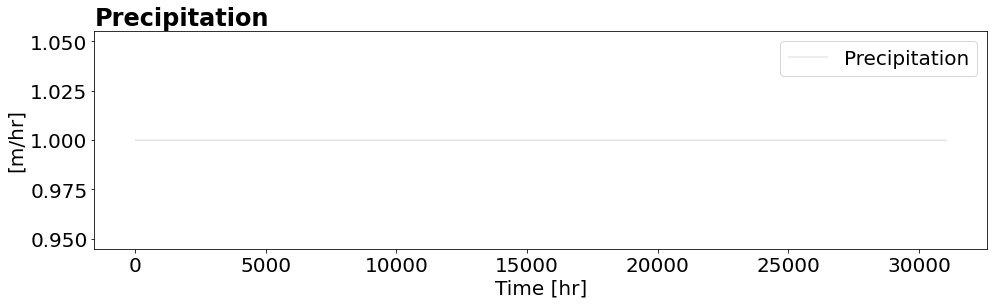

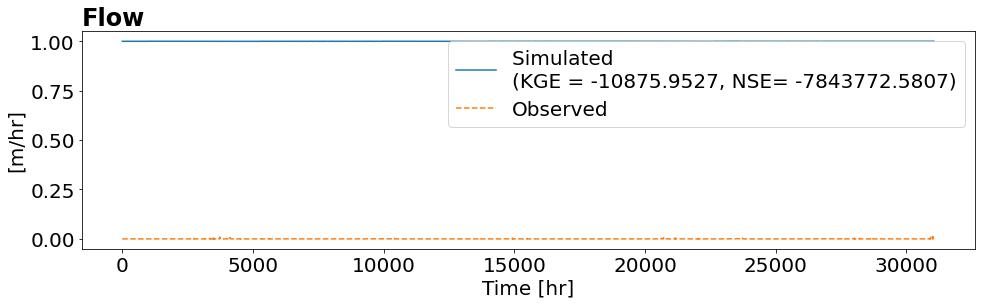

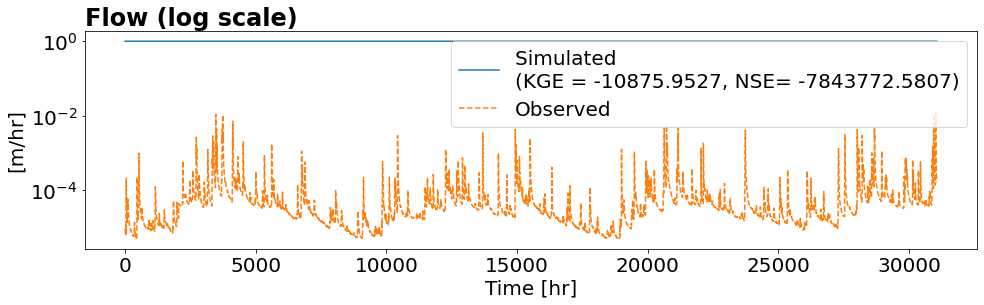

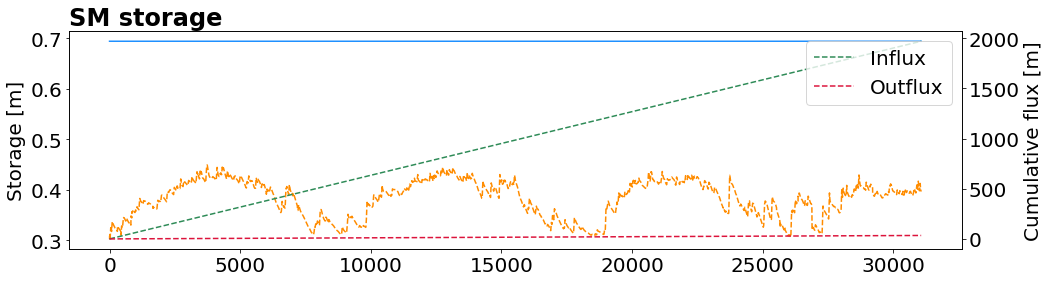

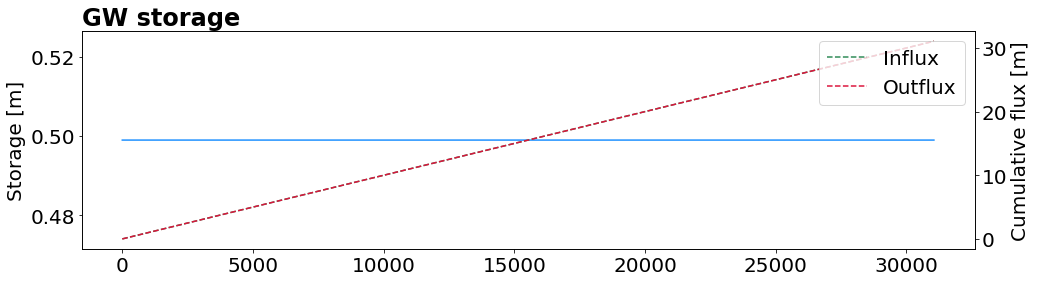

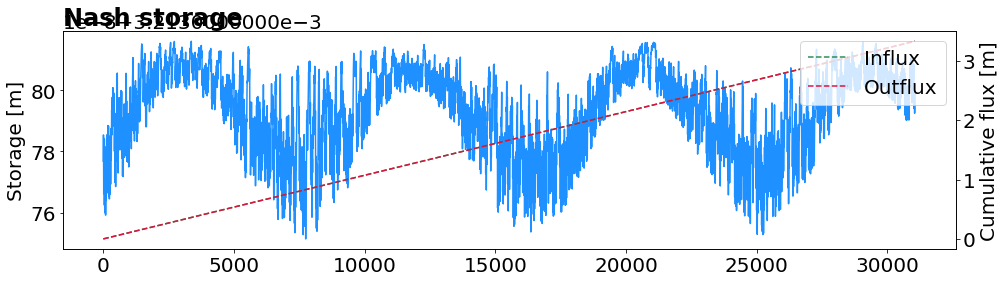

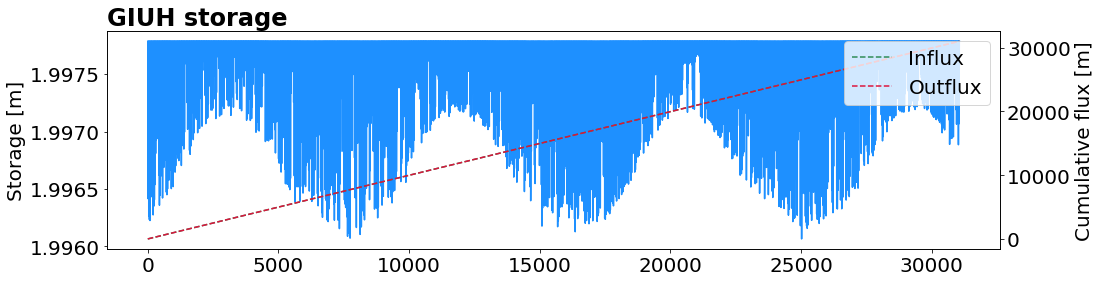


GLOBAL MASS BALANCE
  initial volume:   1.2830
    volume input: 39822.0000
   volume output: 39820.0930
    final volume:   1.1932
        residual: -1.0001e-03

 AET & PET
      volume PET:   5.1657
      volume AET:   5.1657
ET from rainfall:   5.1657
    ET from soil:   0.0000

SCHAAKE MASS BALANCE
    volume input: 39822.0000
ET from rainfall:   5.1657
  surface runoff: 39772.8332
             IOF: 37290.8573
             SOF: 2481.9758
    infiltration:  44.0012
schaake residual: 2.5640e-09

GIUH MASS BALANCE
  vol. into giuh: 39772.8332
   vol. out giuh: 39770.8354
 vol. end giuh q:   1.9978
   giuh residual: -3.5765e-09

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.7830
  vol. into soil:  44.0012
vol.soil2latflow:   4.2660
 vol. soil to gw:  39.8240
 vol. soil to ET:   0.0000
 final vol. soil:   0.6942
vol. soil resid.: 2.7718e-11

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   4.2660
  vol. from nash:   4.2628
 final vol. nash:   0.00

In [15]:
cfe_instance = bmi_cfe.BMI_CFE(input_path)
cfe_instance.initialize()
cfe_instance.run_unit_test(plot=True, print_fluxes=False, warm_up=True)
cfe_instance.finalize(print_mass_balance=True)